In [ ]:
# Load Dataset

!git clone https://github.com/beotborry/DLDataset.git

Cloning into 'DLDataset'...
remote: Enumerating objects: 3721, done.
remote: Counting objects: 100% (3721/3721), done.
remote: Compressing objects: 100% (3721/3721), done.
remote: Total 16262 (delta 0), reused 3720 (delta 0), pack-reused 12541
Receiving objects: 100% (16262/16262), 2.69 GiB | 51.59 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (7554/7554), done.


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import numpy as np

In [ ]:
# Data Path
with_mask_paths = ["./DLDataset/with_mask/with_mask_" + str(i) + ".jpg" for i in range(1, 3725 + 1)]
without_mask_paths = ["./DLDataset/without_mask/without_mask_" + str(i) + ".jpg" for i in range(1, 3828 + 1)]

In [ ]:
# utils.py Codes

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt

def load_data_with_label(path_arr, data_arr, label_arr, img_size, _label):
    for path in path_arr:
        try:
            img = load_img(path, target_size = img_size)
            img = img_to_array(img)
            img = preprocess_input(img)
            data_arr.append(img)
            label_arr.append(_label)
        except:
            print(path)

def training_log_plot(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8,8))
    plt.subplot(2, 1, 1)
    plt.plot(accuracy, label = "TRNG_ACC")
    plt.plot(val_accuracy, label = "VAL_ACC")

    plt.ylabel("Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(loss, label = "TRNG_LOSS")
    plt.plot(val_loss, label = "VAL_LOSS")

    plt.xlabel("Epoch")
    plt.ylabel("Cross Entropy")
    plt.title("Loss")
    plt.legend()
    plt.savefig("./fig.png")
    plt.show()

def export_model_summary(model):
    with open("report.txt", "w") as fh:
        model.summary(print_fn=lambda x: fh.write(x + '\n'))

In [ ]:

# Declare array for storing data & corresponding label
data = []
label = []

# Load with_mask data
load_data_with_label(path_arr=with_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 1)

# Load without_mask data
load_data_with_label(path_arr=without_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 0)

print("Data Load Done!")

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Data Load Done!


In [ ]:
# Convert to numpy array
data = np.array(data, dtype="float32")
label = np.array(label)

# Label one-hot encoding
_lb = LabelBinarizer()

label = _lb.fit_transform(label)
label = to_categorical(label)

In [ ]:
# Split data to train data and test data
(train_X, test_X, train_Y, test_Y) = train_test_split(data, label,
                                                      test_size=0.15,
                                                      stratify=label,
                                                      random_state=777,
                                                      shuffle=True)

In [ ]:

# Make model

base_model = MobileNetV2(weights="imagenet",
                         include_top=False,
                         input_tensor=Input(shape=(224,224,3)))

main_model = base_model.output
main_model = AveragePooling2D(pool_size=(7,7))(main_model)
main_model = Flatten()(main_model)
main_model = Dense(128, activation='relu')(main_model)
main_model = Dropout(0.5)(main_model)
main_model = Dense(2, activation="softmax")(main_model)

model = Model(inputs = base_model.input, outputs = main_model)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# Declare epoch, batch size, optimizer
epochs = 30
batch_size = 100
optimizer = Adam(learning_rate=1e-4, decay = 1e-4/epochs)

In [ ]:
# Compile and training
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])

history = model.fit(train_X, train_Y,
                    batch_size=batch_size,
                    validation_split=0.1,
                    epochs = epochs)

# Model save
model.save("./checkpoint")

Epoch 1/30
58/58 [==============================] - 47s 619ms/step - loss: 0.3941 - accuracy: 0.8237 - val_loss: 0.0449 - val_accuracy: 0.9813
Epoch 2/30
58/58 [==============================] - 35s 606ms/step - loss: 0.0170 - accuracy: 0.9969 - val_loss: 0.0442 - val_accuracy: 0.9829
Epoch 3/30
58/58 [==============================] - 36s 622ms/step - loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.0459 - val_accuracy: 0.9844
Epoch 4/30
58/58 [==============================] - 36s 624ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 5/30
58/58 [==============================] - 36s 614ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0186 - val_accuracy: 0.9922
Epoch 6/30
58/58 [==============================] - 36s 620ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 0.9907
Epoch 7/30
58/58 [==============================] - 36s 617ms/step - loss: 6.9961e-04 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.

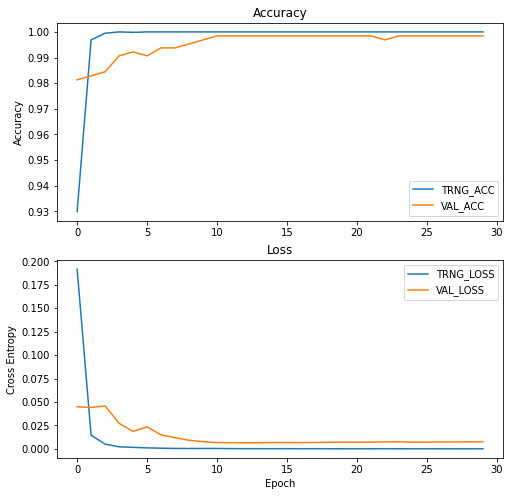

36/36 [==============================] - 2s 41ms/step - loss: 0.0196 - accuracy: 0.9974


[0.019625669345259666, 0.9973521828651428]

In [ ]:
# Draw Plot and Save
training_log_plot(history)

# Evaluate
model.evaluate(test_X, test_Y)